In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("Academic Performance.csv")

In [3]:
df

,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage
0,1,Smit,M,Comp,72,62.0,98.0,63.0,89.0,36,368,73.6
1,2,Ayush,M,IT,58,62.0,83.0,83.0,88.0,34,350,70.0
2,3,Abhijeet,M,IT,57,-20.0,100.0,NaN,56.0,36,192,38.4
3,4,Aryan,M,IT,60,89.0,83.0,70.0,33.0,23,298,59.6
4,5,Suraj,M,Comp,85,90.0,NaN,78.0,23.0,56,247,49.4
5,6,Yash,M,ENTC,94,99.0,84.0,100.0,56.0,99,438,87.6
6,7,Abhishek,M,ENTC,98,88.0,95.0,81.0,78.0,78,420,84.0
7,8,Rohit,M,ENTC,75,66.0,51.0,83.0,-99.0,76,192,38.4
8,9,Virat,M,ENTC,63,NaN,NaN,97.0,56.0,55,208,41.6
9,10,Siddharth,M,ENTC,96,67.0,78.0,95.0,NaN,98,338,67.6


In [4]:
df.shape

(20, 12)

In [5]:
df.head()

,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage
0,1,Smit,M,Comp,72,62.0,98.0,63.0,89.0,36,368,73.6
1,2,Ayush,M,IT,58,62.0,83.0,83.0,88.0,34,350,70.0
2,3,Abhijeet,M,IT,57,-20.0,100.0,NaN,56.0,36,192,38.4
3,4,Aryan,M,IT,60,89.0,83.0,70.0,33.0,23,298,59.6
4,5,Suraj,M,Comp,85,90.0,NaN,78.0,23.0,56,247,49.4


In [6]:
df.tail()

,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage
15,16,Saanvi,F,Comp,66,90.0,95.0,67.0,99.0,77,428,85.6
16,17,Zaranew,F,Comp,93,54.0,NaN,75.0,90.0,65,284,56.8
17,18,Inaya,F,Comp,74,67.0,93.0,93.0,87.0,99,439,87.8
18,19,Arya,F,Comp,72,88.0,84.0,81.0,80.0,45,378,75.6
19,20,Zain,F,Comp,53,76.0,81.0,93.0,65.0,23,338,67.6


In [9]:
df.isnull().sum()

Rollno        0
Name          0
Gender        0
Branch        0
Attendnace    0
C# Marks      1
C++ Marks     3
M3 Marks      2
M2 Marks      1
M1 Marks      0
Total         0
Percentage    0
dtype: int64

In [8]:
# now, we need to make a list for the cols who have missing vals 

missing_val_cols = []
for col in df.columns:
    if df[col].isna().sum() > 0:
        missing_val_cols.append(col)
        
missing_val_cols 

"""

 If the column has one or more missing values 
 (i.e., if the sum of missing values is greater than 0), 
 the column name (col) is appended to the missing_val_cols list 
 using missing_val_cols.append(col)
 
"""

['C# Marks', 'C++ Marks', 'M3 Marks', 'M2 Marks']

In [11]:
# Disable warning for chained assignments
pd.options.mode.chained_assignment = None

# Iterate through columns with missing values
for col in missing_val_cols:
    col_dt = df[col].dtypes
    if col_dt == 'int64' or col_dt == 'float64':
        df_col = df[col]
        for i in range(df.shape[0]):
            if df_col[i] < 0 or df_col[i] > 100:
                df_col[i] = np.nan
        df_col.fillna(df_col.mean(), inplace=True)
    else:
        df[col] = df[col].fillna(method='ffill')

# Print the updated DataFrame
print(df)

"""

A chained assignment occurs when multiple indexing operations 
are performed consecutively, potentially leading to unpredictable behavior

If the data type of the column is either 'int64' or 'float64' 
(indicating a numerical column), it proceeds to fill missing values 
based on certain conditions.

"""

    Rollno       Name Gender Branch  Attendnace   C# Marks   C++ Marks   
0        1       Smit      M   Comp          72  62.000000   98.000000  \
1        2      Ayush      M     IT          58  62.000000   83.000000   
2        3   Abhijeet      M     IT          57  74.058824  100.000000   
3        4      Aryan      M     IT          60  89.000000   83.000000   
4        5      Suraj      M   Comp          85  90.000000   80.764706   
5        6       Yash      M   ENTC          94  99.000000   84.000000   
6        7   Abhishek      M   ENTC          98  88.000000   95.000000   
7        8      Rohit      M   ENTC          75  66.000000   51.000000   
8        9      Virat      M   ENTC          63  74.058824   80.764706   
9       10  Siddharth      M   ENTC          96  67.000000   78.000000   
10      11     Vihaan      M   ENTC          82  54.000000   70.000000   
11      12  Indrajeet      M     IT          75  64.000000   67.000000   
12      13     Aarush      M     IT   

In [13]:
# Corretion in total marks, % after filling missing vals 

df['Total']=df['C# Marks']+df['C++ Marks']+df['M3 Marks']+df['M2 Marks']+df['M1 Marks']
df['Percentage']=df['Total']/5
df

,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage
0,1,Smit,M,Comp,72,62.000000,98.000000,63.000000,89.000000,36,348.000000,69.600000
1,2,Ayush,M,IT,58,62.000000,83.000000,83.000000,88.000000,34,350.000000,70.000000
2,3,Abhijeet,M,IT,57,74.058824,100.000000,83.444444,56.000000,36,349.503268,69.900654
3,4,Aryan,M,IT,60,89.000000,83.000000,70.000000,33.000000,23,298.000000,59.600000
4,5,Suraj,M,Comp,85,90.000000,80.764706,78.000000,23.000000,56,327.764706,65.552941
5,6,Yash,M,ENTC,94,99.000000,84.000000,100.000000,56.000000,99,438.000000,87.600000
6,7,Abhishek,M,ENTC,98,88.000000,95.000000,81.000000,78.000000,78,420.000000,84.000000
7,8,Rohit,M,ENTC,75,66.000000,51.000000,83.000000,69.611111,76,345.611111,69.122222
8,9,Virat,M,ENTC,63,74.058824,80.764706,97.000000,56.000000,55,362.823529,72.564706
9,10,Siddharth,M,ENTC,96,67.000000,78.000000,95.000000,69.611111,98,407.611111,81.522222


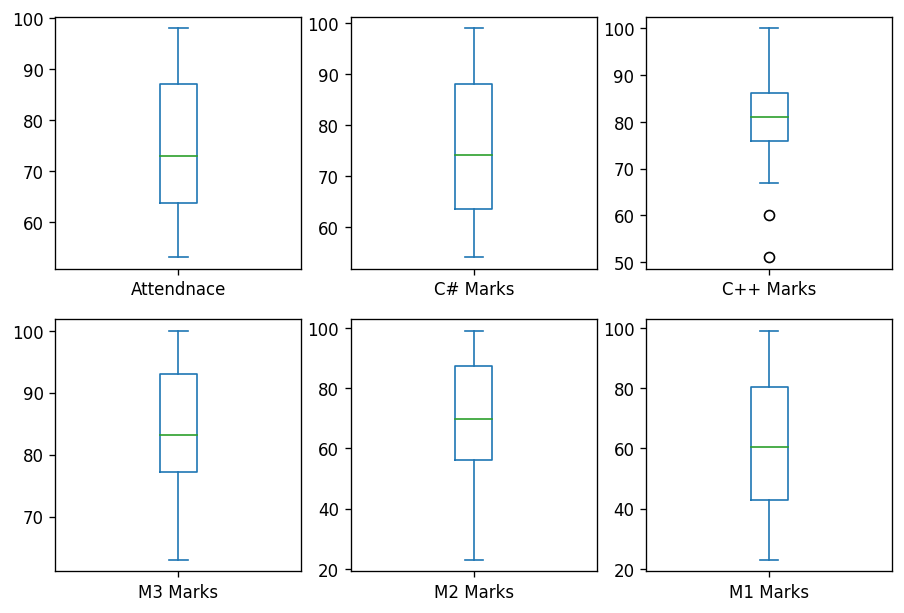

In [17]:
# Outlier detection
# Used box plot for outlier detection

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6) # 9x6 inches.

df_list = ['Attendnace', 'C# Marks', 'C++ Marks', 'M3 Marks', 'M2 Marks', 'M1 Marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120) # setting the Dots per inch for the figure 

count = 0
for r in range(2): # rows
    for c in range(3): # cols
        df[df_list[count]].plot(kind='box', ax=axes[r, c])
        count += 1

plt.show()

In [18]:
# Removal of outliers from C++ Marks
# The method used here for outlier removal is the Interquartile Range (IQR) method.

Q1 = df['C++ Marks'].quantile(0.25)
Q3 = df['C++ Marks'].quantile(0.75)
IQR = Q3 - Q1
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR
print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')

Q1 = 76.0, Q3 = 86.25, IQR = 10.25, Lower_limit = 60.625, Upper_limit = 101.625


In [19]:
df[(df['C++ Marks'] < Lower_limit) | (df['C++ Marks'] > Upper_limit)]

,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage
7,8,Rohit,M,ENTC,75,66.0,51.0,83.0,69.611111,76,345.611111,69.122222
14,15,Maryam,F,IT,64,87.0,60.0,90.0,65.000000,90,392.000000,78.400000


In [20]:
df[(df['C++ Marks'] < Lower_limit) & (df['C++ Marks'] > Upper_limit)]

,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage


# Normal Distribution Conversion

In [24]:
def BinningFunction(column, cut_points, labels = None) :
    minper = column.min()
    maxper = column.max( )
    break_points=[minper] + cut_points + [maxper]
    print('Gradding According to percentage \n>60 = F \n60-70 = B \n70-80 = A\n80-100 = O')
    t=pd.cut(column, bins=break_points, labels=labels, include_lowest=True)
    return t

In [25]:
cut_points=[60, 70, 80]
labels=['F', 'B', 'A', 'O']
df['Grade']=BinningFunction(df['Percentage'], cut_points, labels)
df

Gradding According to percentage 
>60 = F 
60-70 = B 
70-80 = A
80-100 = O


,Rollno,Name,Gender,Branch,Attendnace,C# Marks,C++ Marks,M3 Marks,M2 Marks,M1 Marks,Total,Percentage,Grade
0,1,Smit,M,Comp,72,62.000000,98.000000,63.000000,89.000000,36,348.000000,69.600000,B
1,2,Ayush,M,IT,58,62.000000,83.000000,83.000000,88.000000,34,350.000000,70.000000,B
2,3,Abhijeet,M,IT,57,74.058824,100.000000,83.444444,56.000000,36,349.503268,69.900654,B
3,4,Aryan,M,IT,60,89.000000,83.000000,70.000000,33.000000,23,298.000000,59.600000,F
4,5,Suraj,M,Comp,85,90.000000,80.764706,78.000000,23.000000,56,327.764706,65.552941,B
5,6,Yash,M,ENTC,94,99.000000,84.000000,100.000000,56.000000,99,438.000000,87.600000,O
6,7,Abhishek,M,ENTC,98,88.000000,95.000000,81.000000,78.000000,78,420.000000,84.000000,O
7,8,Rohit,M,ENTC,75,66.000000,51.000000,83.000000,69.611111,76,345.611111,69.122222,B
8,9,Virat,M,ENTC,63,74.058824,80.764706,97.000000,56.000000,55,362.823529,72.564706,A
9,10,Siddharth,M,ENTC,96,67.000000,78.000000,95.000000,69.611111,98,407.611111,81.522222,O
